<h2><center>Starter Code for BNOTE Practice Challange</center></h2>

Note : Create a copy of the notebook and use the copy for submission. Go to File > Save a Copy in Drive to create a new copy



#### Author: Gauransh Kumar

# Downloading Dataset


Installing `aicrowd-cli`

In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/F8tvl-JsibRFxpOHxV45G8KSYXSf8dcSXZ1FC-X2p4c
Opening in existing browser session.
API Key valid
Saved API Key successfully!


In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c bnote -o data

train.csv:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

# Importing Libraries

In this baseline, we will be using skleanr library to train the model and generate the predictions

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Reading the dataset

Here, we will read the `train.csv` which contains both training samples & labels, and `test.csv` which contains testing samples.

In [5]:
# Reading the CSV
train_data_df = pd.read_csv("data/train.csv", header=None)
test_data_df = pd.read_csv("data/test.csv", header=None)

# train_data.shape, test_data.shape
display(train_data_df.head())
display(test_data_df.head())


0       1        2        3  4
0  3.62160  8.6661 -2.80730 -0.44699  0
1  3.38480  3.2674  0.90967  0.25128  0
2  1.56910  6.3465 -0.18280 -2.40990  0
3  1.26160  4.4303 -1.33350 -1.75170  0
4  0.90407  3.3708 -4.49870 -3.69650  1

0        1        2        3
0  0.12126  0.22347 -0.47327  0.97024
1  2.67190  3.06460  0.37158  0.58619
2 -0.11996  6.87410  0.91995 -0.66940
3 -3.34580 -0.50491  2.63280  0.53705
4 -6.95990  8.99310  0.21820 -4.57200

## Data Preprocessing

In [6]:
# Separating data from the dataframe for final training
X = train_data_df.drop(columns=[4]).to_numpy()
y = train_data_df[4].to_numpy()
print(X.shape, y.shape)

(1097, 4) (1097,)


/home/gauransh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

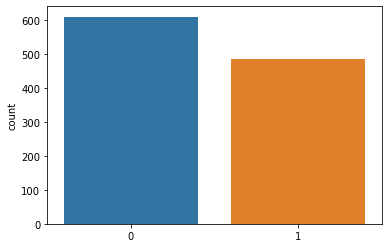

In [7]:
# Visualising the final lable classes for training
sns.countplot(y)

## Splitting the data

In [8]:
# Splitting the training set, and training & validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(877, 4)
(877,)


In [9]:
X_train[0], y_train[0]

(array([-2.62   , -6.8555 ,  6.2169 , -0.62285]), 1)

# Training the Model

In [10]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

# Validation

In [11]:
model.score(X_val, y_val)

1.0

So, we are done with the baseline let's test with real testing data and see how we submit it to challange.

# Predictions

In [12]:
# Separating data from the dataframe for final testing
X_test = test_data_df.to_numpy()
print(X_test.shape)

(275, 4)


In [13]:
# Predicting the labels
predictions = model.predict(X_test)
predictions.shape

(275,)

In [14]:
# Converting the predictions array into pandas dataset
submission = pd.DataFrame({"label":predictions})
submission

label
0        1
1        0
2        0
3        1
4        1
..     ...
270      0
271      1
272      1
273      0
274      0

[275 rows x 1 columns]

In [15]:
# Saving the pandas dataframe
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"), index=False)

# Submitting our Predictions
**Note : Please save the notebook before submitting it (Ctrl + S)**

In [16]:
!!aicrowd submission create -c bnote -f assets/submission.csv

['submission.csv ━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 2,201/556 bytes • ? • 0:00:00',
 '                                                   ╭─────────────────────────╮                                                   ',
 '                                                   │ Successfully submitted! │                                                   ',
 '                                                   ╰─────────────────────────╯                                                   ',
 '                                                         Important links                                                         ',
 '┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────┐',
 '│  This submission │ https://www.aicrowd.com/challenges/nit-kurukshetra-ai-blitz/problems/bnote/submissions/169733              │',
 '│                  │                                                                                         